# Todo

## Librerias

In [6]:
%cd ..
!ls

/scratch/tfg_luis_2223
drive	    LightX3ECGPrivate	PrediccionesLightX3ECG.ipynb
LightX3ECG  MostrarCasos.ipynb


In [7]:
!git clone https://github.com/lhkhiem28/lightx3ecg #Repo Khiem
#!git clone https://github.com/isma40000/LightX3ECG.git #Fork nuestro

Clonando en 'lightx3ecg'...
remote: Enumerating objects: 231, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 231 (delta 23), reused 20 (delta 18), pack-reused 200
Recibiendo objetos: 100% (231/231), 658.06 KiB | 4.36 MiB/s, listo.
Resolviendo deltas: 100% (115/115), listo.


In [ ]:
# !pip install sierraecg &> /dev/null
# !pip install h5py &> /dev/null
# !pip install wfdb &> /dev/null
# !pip install tensorflow &> /dev/null
# !pip install xmljson &> /dev/null
# !pip install tqdm &> /dev/null


# !pip3 install pytorch_lightning &> /dev/null
# !pip3 install neurokit2 &> /dev/null
# !pip3 install captum &> /dev/null
# !pip3 install keras &> /dev/null
# !pip3 install keras_preprocessing &> /dev/null

### Comprobar si están todos los numpy necesarios

In [ ]:
!cd drive/Shareddrives/TFG_INFO/Codigo/Casos/Chapman/CasosNumpy

In [8]:
!ls -1 drive/Shareddrives/TFG_INFO/Codigo/Casos/Chapman/CasosNumpy | tail -5

JS10642.npy
JS10643.npy
JS10644.npy
JS10645.npy
JS10646.npy


In [ ]:
''' import numpy as np
import pandas as pd
from numpy import zeros, newaxis
import h5py
import wfdb
import wfdb.io.convert.csv
from pkgutil import iter_modules
import scipy.signal  as sgn
from xmljson import badgerfish as bf
from xml.etree.ElementTree import fromstring
import base64
import os
import time
from sierraecg import read_file
import sierraecg.lib as sl

os.system("cp -a /content/drive/Shareddrives/TFG_INFO/Codigo/Casos/CPSC-2018/. /content/") '''

### Modificar archivo lib


Modificar libs.py para que tenga keras_preprocessing. https://stackoverflow.com/questions/72326025/cannot-import-name-pad-sequences-from-keras-preprocessing-sequence

In [ ]:
!echo -e 'import os, sys;\nimport warnings; warnings.filterwarnings("ignore")\nimport pytorch_lightning;\npytorch_lightning.seed_everything(22);\nfrom tqdm import tqdm;\nimport argparse;\nimport random;\nimport pandas, numpy as np;\nimport neurokit2 as nk;\nimport torch;\nimport torch.nn as nn, torch.optim as optim;\nimport torch.nn.functional as F;\nimport torch.nn.utils.prune as prune;\nimport captum.attr as attr;\nimport matplotlib.pyplot as pyplot;\nfrom keras_preprocessing.sequence import pad_sequences;\nfrom sklearn.metrics import f1_score;\n' > /content/LightX3ECG/source/libs.py

In [1]:
import importlib.util
import sys
import os
# import tensorflow.keras as keras
spec = importlib.util.spec_from_file_location("module.name", "./source/libs.py")
foo = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = foo
spec.loader.exec_module(foo)
# foo.MyClass()
spec = importlib.util.spec_from_file_location("module.name", "./source/configVars.py")
foo = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = foo
spec.loader.exec_module(foo)

Global seed set to 22


In [ ]:
casos = ['A0192','A1778','A5452','A0370','A1007','A2472','A0741',
         'A3811','A5868','A0977','A1213','A1754','A0345','A2701',
         'A3568','A3046','A3342','A3525','A2808','A3542','A6343',
         'A0432','A0984','A2260','A0054','A5431','A5673']
casos.sort()
print(casos)


['A0054', 'A0192', 'A0345', 'A0370', 'A0432', 'A0741', 'A0977', 'A0984', 'A1007', 'A1213', 'A1754', 'A1778', 'A2260', 'A2472', 'A2701', 'A2808', 'A3046', 'A3342', 'A3525', 'A3542', 'A3568', 'A3811', 'A5431', 'A5452', 'A5673', 'A5868', 'A6343']


## Opciones comando train.py

In [14]:
!python3 train.py -h

Global seed set to 22
usage: train.py [-h] [--dataset DATASET] [--num_classes NUM_CLASSES]
                [--multilabel] [--num_gpus NUM_GPUS]

optional arguments:
  -h, --help            show this help message and exit
  --dataset DATASET
  --num_classes NUM_CLASSES
  --multilabel
  --num_gpus NUM_GPUS


## Entrenar modelo + Predecir

### Chapman

In [9]:
%cd ../LightX3ECGPrivate/source
!python3 tools/train.py --dataset "Chapman" --num_classes 4 --num_gpus 4

/scratch/tfg_luis_2223/LightX3ECGPrivate/source
Global seed set to 22
Namespace(dataset='Chapman', multilabel=False, num_classes=4, num_gpus=4)

Start Training ...
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
epoch  1/ 5
----------------
100%|███████████████████████████████████████████| 38/38 [00:05<00:00,  6.63it/s]
epoch  2/ 5
----------------
100%|███████████████████████████████████████████| 38/38 [00:06<00:00,  6.20it/s]
epoch  3/ 5
----------------
100%|███████████████████████████████████████████| 38/38 [00:06<00:00,  6.33it/s]
epoch  4/ 5
----------------
100%|███████████████████████████████████████████| 38/38 [00:06<00:00,  5.93it/s]
epoch  5/ 5
----------------
100%|███████████████████████████████████████████| 38/38 [00:06<00:00,  6.18it/s]

Start Evaluation ...
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
100%|███████████████████████████████████████████| 38/38 [00:06<00:00,  6.24it/s]
############Validation###########


Precision:0.9615934372347682
0.9615934372347682
R

In [32]:
%cd source
!python3 tools/predict.py --dataset "Chapman" --num_classes 4 --num_gpus 4
%cd ..

/scratch/tfg_luis_2223/LightX3ECGPrivate/source
Global seed set to 22
100%|█████████████████████████████████████████████| 1/1 [00:06<00:00,  6.14s/it]

(18, 4)

[array([0.4404623 , 0.04086373, 0.99068403, 0.00936142], dtype=float32), array([0.43914887, 0.04085704, 0.9907115 , 0.00938454], dtype=float32), array([0.43971   , 0.04086057, 0.99070054, 0.00937436], dtype=float32), array([0.4397686 , 0.04078478, 0.9907279 , 0.00934619], dtype=float32), array([0.43794817, 0.04080398, 0.9907612 , 0.00937792], dtype=float32), array([0.4428083 , 0.04084499, 0.9906493 , 0.00931797], dtype=float32), array([0.9970355 , 0.98436683, 0.00866621, 0.00159648], dtype=float32), array([0.9999659 , 0.0991403 , 0.00232576, 0.073984  ], dtype=float32), array([0.9969277 , 0.94746226, 0.00711844, 0.0131661 ], dtype=float32), array([0.01143011, 0.9997702 , 0.01764564, 0.24724886], dtype=float32), array([0.01552732, 0.99670947, 0.06347328, 0.44768697], dtype=float32), array([0.01801886, 0.9989784 , 0.07307324, 0.1

In [8]:
%cd source
!python3 tools/predict.py --dataset "Chapman" --num_classes 4 --num_gpus 4
%cd ..

/scratch/tfg_luis_2223/LightX3ECGPrivate/source
Global seed set to 222
^C
/scratch/tfg_luis_2223/LightX3ECGPrivate


### CPSC-2018

In [10]:
%cd source
!python3 tools/train.py --dataset "CPSC-2018" --num_classes 9 --multilabel --num_gpus 4
%cd ..

/scratch/tfg_luis_2223/LightX3ECGPrivate/source
Global seed set to 222
Namespace(dataset='CPSC-2018', multilabel=True, num_classes=9, num_gpus=4)

Start Training ...
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
^C
/scratch/tfg_luis_2223/LightX3ECGPrivate


In [27]:
%cd LightX3ECG/source/
!python3 tools/train.py --dataset "CPSC-2018" --num_classes 9 --multilabel --num_gpus 4

[Errno 2] No such file or directory: 'LightX3ECG/source/'
/scratch/tfg_luis_2223/LightX3ECG/source
Global seed set to 22
Namespace(dataset='CPSC-2018', multilabel=True, num_classes=9, num_gpus=4)

Start Training ...
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
epoch  1/70
----------------
100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  7.14it/s]
epoch  2/70
----------------
100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  7.02it/s]
epoch  3/70
----------------
100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  7.18it/s]
epoch  4/70
----------------
100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  6.90it/s]
epoch  5/70
----------------
100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  6.93it/s]
epoch  6/70
----------------
100%|███████████████████████████████████████████| 24/24 [00:03<00:00,  7.01it/s]
epoch  7/70
----------------
100%|█████████████████████████████████████████

In [20]:
%cd LightX3ECG/source/
!python3 tools/predict.py --dataset "CPSC-2018" --num_classes 9 --multilabel --num_gpus 4

[Errno 2] No such file or directory: 'LightX3ECG/source/'
/scratch/tfg_luis_2223/LightX3ECG/source
Global seed set to 22
100%|█████████████████████████████████████████████| 1/1 [00:05<00:00,  5.72s/it]
El reshapeo del array(33, 9)
El reshapeo del array(33, 9)
Forma de las running_labels:

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 

--dataset --> puede ser "Chapman" o "CPSC-2018", si no lo pones no corre

--num_classes --> número de posibles enfermedades parece

--multilabel --> se pone o no,no hace nada falta poner nada más

### Fragmento de código para debugear + Batch_Size

Parece ser que peta por espacio si los batch_size son demasiado grandes, esto se cambia en train.py, linea 26-45. Además este código de debajo permite ver cómo está repartida la memoria de CUDA.

In [ ]:
# %env PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:1024
import os
import torch
#os.environ['PYTORCH_CUDA_ALLOC_CONF'] = "max_split_size_mb:1024"
#!export 'PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:512'
#!echo $PYTORCH_CUDA_ALLOC_CONF
#torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

## Convertir .mat a numpy y distintos formatos de numpy

### Mat a numpy

Carga los archivos .mat de un directorio y los guarda en formato .npy

**Variables**\
fsource : path del archivo .mat\
fdest : path del archivo .npy\
data : array del archivo .mat

In [ ]:
import scipy.io
import numpy as np
import os

def toNumpy(source,dest,name):
    for filename in os.listdir(source):
        fsource = os.path.join(source, filename)
        fdest= os.path.join(dest, filename)

        if os.path.isfile(fsource) and fsource.endswith('.mat'):
            mat = scipy.io.loadmat(fsource)
            data = mat[name]
            np.save(fdest[:-4], data)

#### CPSC-2018

In [ ]:
source = 'drive/Shareddrives/TFG_INFO/Codigo/Casos/CPSC-2018/'
dest = 'drive/Shareddrives/TFG_INFO/Codigo/Casos/CPSC-2018/CasosNumpy/'

toNumpy(source,dest,"ECG")

#### Chapman

In [ ]:
source = 'drive/Shareddrives/TFG_INFO/Codigo/Casos/Chapman/'
dest = 'drive/Shareddrives/TFG_INFO/Codigo/Casos/Chapman/CasosNumpy/'

toNumpy(source,dest,"val")

### Extraer arrays

Cogemos los casos numpy y guardamos solo los arrays de los leads

In [1]:
# import scipy.io
# import numpy as np
# import os
# def transformNumpy(source,dest,div=1,endfilter=".npy"):
#   for filename in os.listdir(source):
#     fsource = os.path.join(source, filename)
#     fdest= os.path.join(dest, filename)

#     if os.path.isfile(fsource) and fsource.endswith(endfilter):

#         # save np.load
#         np_load_old = np.load

#         # modify the default parameters of np.load
#         np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

#         # call load_data with allow_pickle implicitly set to true
#         data = np.load(fsource)
#         if div not in [0,1]:
#           data = data/div
#         # restore np.load for future normal usage
#         np.load = np_load_old

#         np.save(fdest[:-4], data)

# for i in range(1,6):
#     transformNumpy('drive/Shareddrives/TFG_INFO/Codigo/Casos/CPSC-2018/CasosNumpy',
#                'drive/Shareddrives/TFG_INFO/Codigo/Casos/CPSC-2018/CasosNumpy/',200,f"Caso{i}.npy")

### Trasnformar CSV a numpy

In [4]:
from numpy import genfromtxt
import scipy.io
import numpy as np
import os
def CSVtoNumpy(source,dest="",div=1):
    for filename in os.listdir(source):
        print(filename)
        fsource = os.path.join(source, filename)
        fdest= os.path.join(dest, filename)

        if os.path.isfile(fsource) and fsource.endswith('.csv') and not os.path.isfile(f"{fdest[:-4]}.npy"):
            try:
                mat = genfromtxt(fsource, delimiter=',')
                data = mat.transpose()
                data = data/div
                np.save(fdest[:-4], data)
            except:
                print(f"Este archivo da error: {fsource}\n")
# Este archivo da error: drive/Shareddrives/TFG_INFO/Codigo/Casos/Chapman/ECGDataDenoised/MUSE_20180113_124215_52000.csv --> Tenía una fila incompleta, no mide 5000

In [6]:
source = './datasets/Casos/Chapman/ECGDataRaw/'
dest = './datasets/Casos/Chapman/ECGDataRawNpy/'
CSVtoNumpy(source,dest)

A1056.npy
A6655.npy
A6339.npy
A3484.npy
A2617.npy
A4713.npy
A0483.npy
A6348.npy
A3393.npy
A1689.npy
A1763.npy
A0676.npy
A1081.npy
A1121.npy
A2089.npy
A4666.npy
A3444.npy
A6856.npy
A1823.npy
A5897.npy
A1479.npy
A4920.npy
A4515.npy
A3135.npy
A4936.npy
A5522.npy
A6352.npy
A0150.npy
A0894.npy
A2397.npy
A6451.npy
A5256.npy
A3544.npy
A0617.npy
A3910.npy
A3853.npy
A3773.npy
A6292.npy
A4700.npy
A6136.npy
A1978.npy
A6599.npy
A4364.npy
A3238.npy
A6344.npy
A0551.npy
A4372.npy
A3843.npy
A4709.npy
A1102.npy
A6395.npy
A5955.npy
A5764.npy
A1459.npy
A3617.npy
A2572.npy
A5312.npy
A1035.npy
A2584.npy
A3198.npy
A5333.npy
A4905.npy
A3069.npy
A1842.npy
A0979.npy
A1327.npy
A6576.npy
A2153.npy
A4266.npy
A4182.npy
A5112.npy
A6204.npy
A6155.npy
A2622.npy
A1307.npy
A6148.npy
A1099.npy
A4439.npy
A1219.npy
A4180.npy
A4544.npy
A3585.npy
A1986.npy
A1637.npy
A0484.npy
A0395.npy
A3588.npy
A3026.npy
A0701.npy
A5514.npy
A6083.npy
A0232.npy
A5238.npy
A0268.npy
A4914.npy
A4513.npy
A2066.npy
A1240.npy
A4451.npy
A2947.npy


### Dividir caso numpy

In [ ]:
import scipy.io
import numpy as np
import os
import ecg_plot as ep
def divNumpy(source):
    
    for filename in os.listdir(source):
        fsource = os.path.join(source, filename)

        if os.path.isfile(fsource) and fsource.endswith('.npy'):

            data = np.load(fsource)
            data=data/1000
            np.save(os.path.join(f'{source}EntreMil',f'{filename[:-4]}'),data)
divNumpy('datasets/Casos/Chapman/CasosNumpy')

### Eliminar baseline

In [32]:
import numpy as np
import scipy.signal  as sgn
def remove_baseline_filter(sample_rate):
    fc = 0.8  # [Hz], cutoff frequency
    fst = 0.2  # [Hz], rejection band
    rp = 0.5  # [dB], ripple in passband
    rs = 40  # [dB], attenuation in rejection band
    wn = fc / (sample_rate / 2)
    wst = fst / (sample_rate / 2)

    filterorder, aux = sgn.ellipord(wn, wst, rp, rs)
    sos = sgn.iirfilter(filterorder, wn, rp, rs, btype='high', ftype='ellip', output='sos')

    return sos

In [7]:
import scipy.io
import numpy as np
import os
import ecg_plot as ep
def removeBaselineCompare(source,sample_rate=500):
    # i=1
    # for filename in os.listdir(source):
    for filename in ["Caso1.npy","Caso2.npy","Caso3.npy","Caso4.npy","Caso5.npy","Caso6.npy"]:
        fsource = os.path.join(source, filename)

        # if os.path.isfile(fsource) and fsource.endswith(f'Caso{i}.npy'):
        if os.path.isfile(fsource) and fsource.endswith('.npy'):

            data = np.load(fsource)
            fSample=500
            xml_leads = ['DI', 'DII', 'DIII', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
            
            ep.plot(data, sample_rate= fSample,lead_index=xml_leads, title=f"{filename}")
            
            sos = remove_baseline_filter(fSample)
            data = sgn.sosfiltfilt(sos, data, padtype='constant', axis=-1)
            ep.plot(data, sample_rate= fSample,lead_index=xml_leads, title=f"{filename}-NoBaseLine")
            sos2 = remove_baseline_filter(fSample)
            data2 = sgn.sosfiltfilt(sos2, data, padtype='constant', axis=-1)
            ep.plot(data2, sample_rate= fSample,lead_index=xml_leads, title=f"{filename}-NoBaseLine^2")
            print(data)
            print(data2)
            print(np.array_equal(data,data2))
            break
            # np.save(os.path.join(source,f'Caso{i}-NoBL'),data)
            # np.save(os.path.join(source,f'{filename[:-4]}-NoBL'),data)
        #     i+=1
        # if(i>7):
        #     break
def removeBaselineFromFolder(source,sample_rate=500):
    folder = os.path.basename(source)
    # NoBLPath = f"{source}-NoBaseLine"
    NoBLPath = f"{source}"
    print(NoBLPath)
    if os.path.exists(NoBLPath):
        for filename in os.listdir(source):
            fsource = os.path.join(source, filename)
            if os.path.isfile(fsource) and fsource.endswith('.npy'):
                data = np.load(fsource)
                # data = data*1000
                # fSample=500
                # sos = remove_baseline_filter(fSample)
                data=data[:,1:]
                # data = sgn.sosfiltfilt(sos, data, padtype='constant', axis=-1)
                # data = data/1000
                # np.save(os.path.join(NoBLPath,f'{filename[:-4]}-NoBL'),data)
                np.save(os.path.join(NoBLPath,f'{filename[:-4]}'),data)
    
removeBaselineFromFolder('datasets/Casos/Chapman/ECGDataRawNpy')

datasets/Casos/Chapman/ECGDataRawNpy


## Hacer one_hot a los CSV de Chapman

In [26]:
from libs import *
from configVars import *
df = pandas.read_csv(f"{pathCasos}Chapman/val.csv")
# Get one hot encoding of columns B
one_hot = pandas.get_dummies(df['label'],prefix='label')
# Drop column B as it is now encoded
# df = df.drop('B',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df = df[['id', 'age', 'sex', 'label_0','label_1','label_2','label_3','label_4','label_5','label_6','label_7','label_8', 'r_count','length']]
df.head()
df.to_csv(f"{pathCasos}Chapman/val2.csv", index=False)
# cols = df.columns.tolist()
# cols

## Observar un caso

Observar un caso numpy para ver su formato

In [4]:
%cd ..
!ls

/scratch/tfg_luis_2223/LightX3ECGPrivate
datasets  MostrarCasos.ipynb  PrediccionesLightX3ECG.ipynb  README.md  source


(12, 5000)
[[-0.21472 -0.20008 -0.19032 ... -0.09272 -0.09272 -0.08784]
 [-0.22936 -0.20984 -0.1952  ...  0.02928  0.03416  0.02928]
 [-0.01464 -0.00976 -0.00488 ...  0.122    0.12688  0.11712]
 ...
 [ 0.12688  0.16592  0.20496 ...  0.31232  0.31232  0.31232]
 [-0.23912 -0.1952  -0.15128 ...  0.04392  0.05856  0.06344]
 [-0.50752 -0.4636  -0.42944 ... -0.22936 -0.20496 -0.20008]]


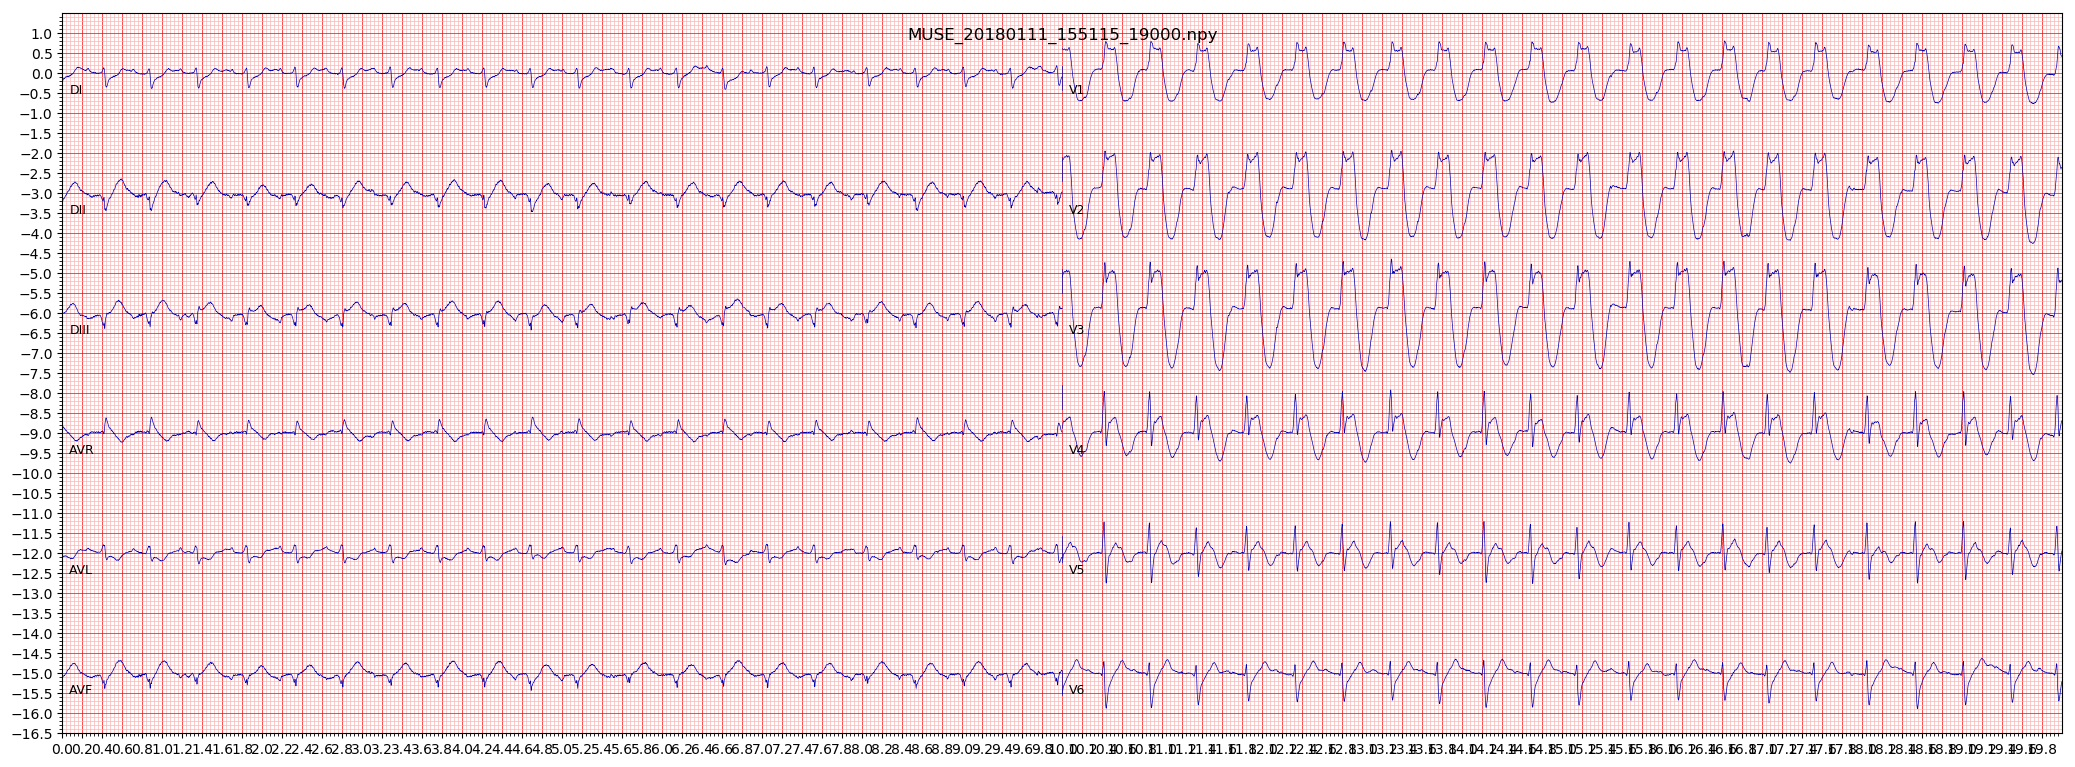

In [8]:
import scipy.io
import numpy as np
import os
import ecg_plot as ep
source = 'datasets/Casos/Chapman/ECGDataRawNpy'

for filename in os.listdir(source):
    fsource = os.path.join(source, filename)

    if os.path.isfile(fsource) and fsource.endswith('MUSE_20180111_155115_19000.npy'):#MUSE_20180111_155115_19000

        # save np.load
        #np_load_old = np.load

        # modify the default parameters of np.load
        #np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

        # call load_data with allow_pickle implicitly set to true
        data = np.load(fsource)
        data = data/1000
        fSample=500
        xml_leads = ['DI', 'DII', 'DIII', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
        ep.plot(data, sample_rate= fSample,lead_index=xml_leads, title=f"{filename}")
        
        print(data.shape)
        print(data)
        # restore np.load for future normal usage
        #np.load = np_load_old
        break;

Se supone que con la versión de numpy 1.16.1 tiene el allow_pickle a True por defecto, lo que evita errores, igualmente es un último recurso usar una versión anterior.

In [ ]:
!pip install numpy==1.16.1

In [4]:
pip install sierraecg

  Could not find a version that satisfies the requirement sierraecg (from versions: )
No matching distribution found for sierraecg


## Apunte

Mirar función loadmat para poder abri los archivos .mat desde python. Mirar Scipy para esa función. 

Ejemplo: https://mdrk.io/end-to-end-example-of-a-deep-learning-based-project-in-healthcare-electrocardiograms-part-1/

Craft

Ejecutar desde scratch porque por red local va lento, en esas máquinas no hay limitación. Tiene 4 GPUs. Revisar cuantas leads usa y cuáles son. Probar con Chapman y predecir cuando el modelo esté guardado en una carpeta persistente.

* ~~Comprobar r_count (número de latidos) y sacar datos de val y train para usar de test sin que se haya entrenado con ello.~~
* ~~Revisar el formato de los datos nuestros Caso1-6.Recordar lo de los 200 mV.~~
* ~~Mover los datos al directorio scratch.~~
* ~~Subir epoch a 70.~~
* ~~Conseguir datos de Chapman que usa Khiem.~~
* Probar si el entrenamiento sin línea de base mejora los resultados de las predicciones. (baseline removal)
* ~~Comprobar si un caso al que se le ha quitado la baseline sigue igual si se la vuelves a quitar. --> Gráficamente parecen iguales pero los valores de los numpy arrays cambian~~
* ~~Representar los datos de test con ecg_plot. -->~~
* ~~Comprobar si los suyos son muy distintos de los nuestros al hacer un plot. Ver si puede haber línea base o qué. -->~~
* ~~Reproducir tabla 2 del paper (f1,precision,etc). Investigar dónde obtiene esas medidas.~~
* ~~Revisar qué labels se corresponden con qué enfermedad en Chapman.~~
* ~~Ajustar nuestros casos al formato csv de Chapman.~~

23/3/2023
* Comprobar a predecir Chapman con CPSC-2018. --> Para poder hacerlo hay que añadir columnas vacías al Chapman Onehot. Probar con columnas a 0 de la label_4 a las label_8 incluidas con el parametro num_classes a 9.
* Probar con casos (por ejemplo SB) coincidentes entre datasets.
* Conseguir entrenar con los modelos con resultados razonables.

* XML --> Sierra --> CSV --> Predecir --> Pasar de xml a CSV no parece posible con esta versión de python, requiere la 3.8, otras opciones también requieren permisos de sudo, requiere más investigación o probar en otro entorno de python con permisos.

* Crear repositorio privado con lo mismo que el actual y los casos si es posible.
* Recordar ver parte de teoría (vídeos,libro).

* Gradio --> la página de demostración no funciona??
* Streamlit --> transformar código de python a una web
* En ECGDataRawNpy hay una columna que tiene valores nan por algún motivo, lo q provoca problemas a la hora de eliminar la baseline y habrá que revisar si también a la hora de predecir